In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HH9ECnEeBwB663gIBlcY")
project = rf.workspace("brad-dwyer").project("pklot-1tros")
version = project.version(2)
dataset = version.download("multiclass")

# Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
df_train_org = pd.read_csv('/content/PKLot-2/train/_classes.csv')
df_test_org = pd.read_csv('/content/PKLot-2/test/_classes.csv')

In [ ]:
df_train_org.columns

Index(['filename', ' space-empty', ' space-occupied'], dtype='object')

In [ ]:
#Changing dataframe (train)
import pandas as pd
from PIL import Image
import numpy as np
%cd /content/PKLot-2/train
# Read the CSV file (assuming it's named 'parking_data.csv')
df = df_train_org
# df = pd.read_csv(csv_file)

# Initialize empty lists to store image data and labels
image_data = []
space_empty_labels = []
space_occupied_labels = []

# Load images and convert to NumPy arrays
for filename, filled, empty in zip(df['filename'], df[' space-occupied'], df[' space-empty']):
    img = Image.open(filename)
    img_array = np.array(img)
    image_data.append(img_array)
    space_occupied_labels.append(filled)
    space_empty_labels.append(empty)

# Create a new DataFrame
train_df = pd.DataFrame({
    'data': image_data,
    'space-occupied': space_occupied_labels,
    'space-empty': space_empty_labels
})

# Now 'new_df' contains the desired DataFrame with image data and labels
# print(new_df.head())  # Display the first few rows


/content/PKLot-2/train


In [ ]:
X_train = train_df['data']

In [ ]:
X_train[0].shape

In [ ]:
import cv2
for i in range(len(X_train)):
    X_train[i] = cv2.resize(X_train[i], (120, 120))

In [ ]:
X_train[178].shape

(120, 120, 3)

In [ ]:
len(X_train)

8691

In [ ]:
#Changing dataframe (test)
import pandas as pd
from PIL import Image
import numpy as np
%cd /content/PKLot-2/test
# Read the CSV file (assuming it's named 'parking_data.csv')
df = df_test_org
# df = pd.read_csv(csv_file)

# Initialize empty lists to store image data and labels
image_data = []
space_empty_labels = []
space_occupied_labels = []

# Load images and convert to NumPy arrays
for filename, filled, empty in zip(df['filename'], df[' space-occupied'], df[' space-empty']):
    img = Image.open(filename)
    img_array = np.array(img)
    image_data.append(img_array)
    space_occupied_labels.append(filled)
    space_empty_labels.append(empty)

# Create a new DataFrame
test_df = pd.DataFrame({
    'data': image_data,
    'space-occupied': space_occupied_labels,
    'space-empty': space_empty_labels
})


In [ ]:
X_test = test_df['data']

In [ ]:
import cv2
for i in range(len(X_test)):
    X_test[i] = cv2.resize(X_test[i], (120, 120))

In [ ]:
# # X_train = train_df['data']
# y_train = train_df[[ 'space-occupied', 'space-empty']]
# # X_test = test_df['data']
# y_test = test_df[[ 'space-occupied', 'space-empty']]

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# train_df['combined'] = train_df.apply(lambda row: np.array([row['space-occupied'], row['space-empty']]), axis=1)
train_df['combined'] = train_df['space-occupied'] * 2 + train_df['space-empty']
test_df['combined'] = test_df['space-occupied'] * 2 + test_df['space-empty']

# Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(train_df['data'], train_df['combined'], test_size=0.3, random_state=1)

In [ ]:
y_train = train_df['combined']
y_test = test_df['combined']

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3])

In [ ]:
len(X_train)

8691

In [ ]:
len(y_train)

8691

In [ ]:
X_train[0].shape

(120, 120, 3)

In [ ]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

array([[[ 98,  96,  94],
        [ 41,  34,  38],
        [ 83,  72,  64],
        ...,
        [ 71,  80,  28],
        [ 62,  67,  38],
        [ 52,  58,  22]],

       [[115, 103,  96],
        [116, 104,  99],
        [118, 105, 103],
        ...,
        [ 89,  96,  44],
        [ 65,  70,  28],
        [ 76,  82,  36]],

       [[119, 108, 105],
        [103,  99,  80],
        [116, 116, 100],
        ...,
        [ 98, 104,  50],
        [ 85,  89,  34],
        [101, 106,  50]],

       ...,

       [[139, 135, 132],
        [139, 130, 120],
        [123, 105, 100],
        ...,
        [ 73,  59,  50],
        [113,  97,  84],
        [124, 106,  94]],

       [[149, 149, 144],
        [154, 147, 136],
        [155, 151, 142],
        ...,
        [ 88,  73,  66],
        [109,  91,  88],
        [127, 109,  97]],

       [[167, 159, 157],
        [140, 121, 114],
        [121, 117, 108],
        ...,
        [ 93,  78,  70],
        [121, 102, 106],
        [118, 100,  86]]], dtype=uint8)
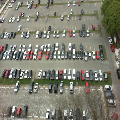

In [ ]:
X_train_np[0]

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# # Flatten the image data into 1D arrays as the classifier performs best on 1D arrays
# # X_train_flat = X_train_np.reshape(X_train_np.shape[0], -1)
# # X_test_flat = X_test_np.reshape(X_test_np.shape[0], -1)
# X_train_flat = X_train_np.reshape(X_train_np.shape[0], -1)
# X_test_flat = X_test_np.reshape(X_test_np.shape[0], -1)

In [ ]:
# y_train_flat = np.argmax(y_train.values, axis=1)

In [ ]:
# type(y_train_flat)

In [ ]:
# y_train_flat.shape

In [ ]:
# X_train_flat.shape

In [ ]:
# type(X_train_flat)

In [ ]:
# y_train_flat[88]

In [ ]:
# n_samples = len(X_train_np)
# X_train_flat = X_train_np.reshape((n_samples, -1))

In [ ]:
# X_train_flat.shape

In [ ]:
y_train.shape

(8691,)

In [ ]:
# non_numeric_cols = train_df.select_dtypes(exclude=[np.number]).columns
# print(non_numeric_cols)

In [ ]:
# type(X_train_flat)

In [ ]:
# X_train_flat.shape

In [ ]:
# y_train.shape

In [ ]:
# type(X_train_flat)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
# X_train_flat[:5]

In [ ]:
# # Assuming X_train is your original array of images
# n_samples = len(X_train)
# n_features = X_train[0].size  # Total number of pixels in an image

# # Flatten each image into a 1D array
# X_train_flat = X_train.reshape((n_samples, n_features))
# Convert the Series to a numpy array of objects
X_train_array = X_train.to_numpy()

# Flatten each image in the array
X_train_flat = np.array([img.flatten() for img in X_train_array])


In [ ]:
X_test_array = X_test.to_numpy()

# Flatten each image in the array
X_test_flat = np.array([img.flatten() for img in X_test_array])


In [ ]:
X_train_flat.shape

(8691, 43200)

None: the scores for each class are returned.
'micro': calculate metrics globally by counting the total true positives, false negatives and false positives.
'macro': calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
'weighted': calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).

If you want to stick with a single SVM model, one option could be to encode your two target columns (“space_occupied” and “space_empty”) into a single column with multiclass labels. For example, you could create a new column where:

‘0’ represents (space_occupied=0, space_empty=0)
‘1’ represents (space_occupied=1, space_empty=0)
‘2’ represents (space_occupied=0, space_empty=1)
‘3’ represents (space_occupied=1, space_empty=1)

# SVM

In [ ]:
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import time
# # Create a SVM classifier
# svm_clf = svm.SVC(max_iter=2)

# # Train the classifier
# svm_clf.fit(X_train_flat, y_train)
# start_time = time.time()
# svm_clf.fit(X_train_flat, y_train)
# end_time = time.time()
# # Predict  for the test data
# y_pred = svm_clf.predict(X_test_flat)



# execution_time = end_time - start_time



# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred,average='micro')
# recall = recall_score(y_test, y_pred,average='micro')
# f1 = f1_score(y_test, y_pred,average='micro')
# # auc = roc_auc_score(y_test, y_pred)

# # Print the evaluation metrics and execution time
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)
# # print("AUC:", auc)
# print("Execution Time:", execution_time)

Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


Accuracy: 0.24879227053140096
Precision: 0.24879227053140096
Recall: 0.24879227053140096
F1 Score: 0.24879227053140096
Execution Time: 2.58661150932312


/content


Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


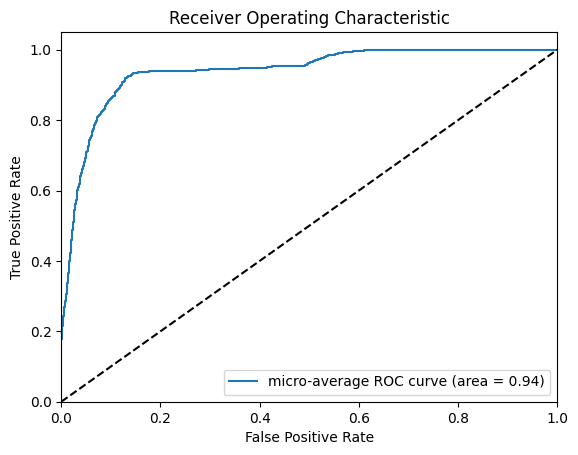

Accuracy: 0.644927536231884
Precision: 0.7712565838976674
Recall: 0.8252818035426731
F1 Score: 0.7973551147413458
Execution Time:  1138.6385798454285


<Figure size 640x480 with 0 Axes>

In [ ]:
%cd /content
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
import time

# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_train_bin.shape[1]

# Learn to predict each class against the other using One-vs-Rest scheme
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, max_iter=500))
time_taken = time.time()
y_score = classifier.fit(X_train_flat, y_train_bin).decision_function(X_test_flat)
time_taken = time.time() - time_taken

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('PS_roc_curve_SVM.png', dpi=300)  # Save the plot as a high-quality image

# Predict the test data
y_pred = classifier.predict(X_test_flat)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_bin, y_pred)
precision = precision_score(y_test_bin, y_pred, average='micro')
recall = recall_score(y_test_bin, y_pred, average='micro')
f1 = f1_score(y_test_bin, y_pred, average='micro')
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Execution Time: ",time_taken)

# Decision Trees

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# import time
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # Create an SVM classifier
# DecisionTrees = DecisionTreeClassifier()

# # Train the SVM classifier
# start_time = time.time()
# DecisionTrees.fit(X_train_flat, y_train)
# end_time = time.time()
# # Predict  for the test data
# y_pred = DecisionTrees.predict(X_test_flat)



# execution_time = end_time - start_time



# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred)

# #Print the evaluation metrics and execution time
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)
# print("AUC:", auc)
# print("Execution Time:", execution_time)

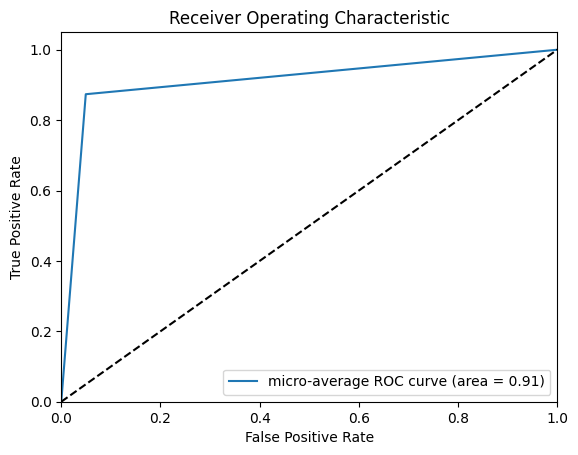

Accuracy: 0.785024154589372
Precision: 0.8550039401103231
Recall: 0.8735909822866345
F1 Score: 0.8641975308641975
Execution Time:  1411.0847098827362


<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from sklearn import tree
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
import time


# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_train_bin.shape[1]

# Learn to predict each class against the other using One-vs-Rest scheme
classifier = OneVsRestClassifier(tree.DecisionTreeClassifier())
time_taken = time.time()
classifier.fit(X_train_flat, y_train_bin)
time_taken = time.time() - time_taken

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_score = classifier.predict_proba(X_test_flat)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), classifier.predict_proba(X_test_flat).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('PS_roc_curve_DT.png', dpi=300)  # Save the plot as a high-quality image

# Predict the test data
y_pred = classifier.predict(X_test_flat)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_bin, y_pred)
precision = precision_score(y_test_bin, y_pred, average='micro')
recall = recall_score(y_test_bin, y_pred, average='micro')
f1 = f1_score(y_test_bin, y_pred, average='micro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Execution Time: ",time_taken)


# Random Forest

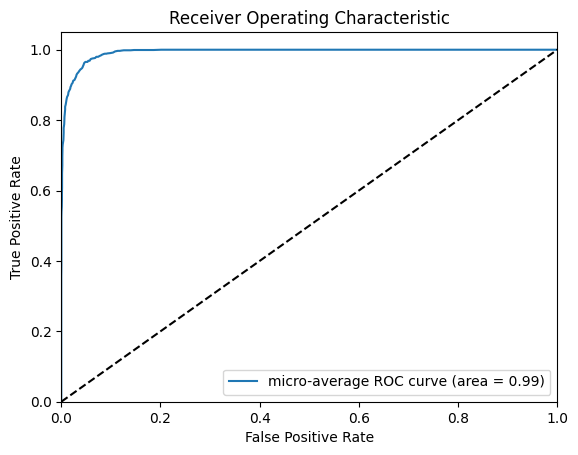

Accuracy: 0.9017713365539453
Precision: 0.919773095623987
Recall: 0.9138486312399355
F1 Score: 0.9168012924071082
Execution Time:  367.6131627559662


<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
import time


# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_train_bin.shape[1]

# Learn to predict each class against the other using One-vs-Rest scheme
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100))
time_taken = time.time()
classifier.fit(X_train_flat, y_train_bin)
time_taken = time.time() - time_taken

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_score = classifier.predict_proba(X_test_flat)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), classifier.predict_proba(X_test_flat).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('PS_roc_curve_RF.png', dpi=300)  # Save the plot as a high-quality image

# Predict the test data
y_pred = classifier.predict(X_test_flat)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_bin, y_pred)
precision = precision_score(y_test_bin, y_pred, average='micro')
recall = recall_score(y_test_bin, y_pred, average='micro')
f1 = f1_score(y_test_bin, y_pred, average='micro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Execution Time: ",time_taken)
